## All Species Seed Match Heatmap
The purpose of this project is to map the seed match abundance of all species. To do this, we will load every species as an array and add the data to a dict, which will be converted to a heatmap. 

In [54]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
from numpy import loadtxt

from collections import Counter

SIZE = 7

We are going to take all the files from the Species Genome Data and concat them into one file:

In [ ]:
filenames = [
'Abingdon island giant tortoise genes (ASM359739v1).txt',
'African ostrich genes (ASM69896v1).txt',
'Algerian mouse genes (SPRET_EiJ_v1).txt',
'Alpaca genes (vicPac1).txt',
'Alpine marmot genes (marMar2.1).txt',
'Amazon molly genes (Poecilia_formosa-5.1.2).txt',
'American bison genes (Bison_UMD1.0).txt',
'American black bear genes (ASM334442v1).txt',
'American mink genes (NNQGG.v01).txt',
'Arabian camel genes (CamDro2).txt',
'Arctic ground squirrel genes (ASM342692v1).txt',
'Argentine black and white tegu genes (HLtupMer3).txt',
'Armadillo genes (Dasnov3.0).txt',
'Asian bonytongue genes (fSclFor1.1).txt',
'Atlantic cod genes (gadMor3.0).txt',
'Atlantic herring genes (Ch_v2.0.2).txt',
#'Atlantic salmon genes (Ssal_v3.1).txt',
'Australian saltwater crocodile genes (CroPor_comp1).txt',
'Ballan wrasse genes (BallGen_V1).txt',
'Barramundi perch genes (ASB_HGAPassembly_v1).txt',
'Beluga whale genes (ASM228892v3).txt',
'Bicolor damselfish genes (Stegastes_partitus-1.0.2).txt',
'Black snub-nosed monkey genes (ASM169854v1).txt',
'Blue whale genes (mBalMus1.v2).txt',
'Blue-ringed sea krait genes (latLat_1.0).txt',
'Bolivian squirrel monkey genes (SaiBol1.0).txt',
'Bonobo genes (panpan1.1).txt',
'Brown trout genes (fSalTru1.1).txt',
'Burtons mouthbrooder genes (AstBur1.0).txt',
'Bushbaby genes (OtoGar3).txt',
'C.intestinalis genes (KH).txt',
'C.savignyi genes (CSAV 2.0).txt',
'Caenorhabditis elegans (PRJNA13758) genes (WBcel235).txt',
'Capuchin genes (Cebus_imitator-1.0).txt',
'Cat genes (Felis_catus_9.0).txt',
'Chacoan peccary genes (CatWag_v2_BIUU_UCD).txt',
'Channel bull blenny genes (fCotGob3.1).txt',
'Channel catfish genes (IpCoco_1.2).txt',
'Chimpanzee genes (Pan_tro_3.0).txt',
'Chinese hamster CHOK1GS genes (CHOK1GS_HDv1).txt',
'Chinese medaka genes (ASM858656v1).txt',
'Chinese softshell turtle genes (PelSin_1.0).txt',
'Chinook salmon genes (Otsh_v1.0).txt',
'Climbing perch genes (fAnaTes1.2).txt',
'Clown anemonefish genes (AmpOce1.0).txt',
'Coelacanth genes (LatCha1).txt',
'Coho salmon genes (Okis_V2).txt',
'Collared flycatcher genes (FicAlb1.5).txt',
'Common canary genes (SCA1).txt',
'Common carp genes (common_carp_genome).txt',
'Common wall lizard genes (PodMur_1.0).txt',
'Common wombat genes (bare-nosed_wombat_genome_assembly).txt',
'Coquerels sifaka genes (Pcoq_1.0).txt',
'Cow genes (ARS-UCD1.2).txt',
'Crab-eating macaque genes (Macaca_fascicularis_6.0).txt',
'Degu genes (OctDeg1.0).txt',
'Denticle herring genes (fDenClu1.1).txt',
'Dingo genes (ASM325472v1).txt',
'Dog genes (ROS_Cfam_1.0).txt',
'Dolphin genes (turTru1).txt',
'Domestic yak genes (LU_Bosgru_v3.0).txt',
'Donkey genes (ASM303372v1).txt',
'Drill genes (Mleu.le_1.0).txt',
'Drosophila melanogaster genes (BDGP6.32).txt',
'Duck genes (CAU_duck1.0).txt',
'Eastern brown snake genes (EBS10Xv2-PRI).txt',
'Eastern happy genes (fAstCal1.2).txt',
'Electric eel genes (Ee_SOAP_WITH_SSPACE).txt',
'Elephant genes (Loxafr3.0).txt',
'Elephant shark genes (Callorhinchus_milii-6.1.3).txt',
'Eurasian red squirrel genes (mSciVul1.1).txt',
'European seabass genes (dlabrax2021).txt',
'Ferret genes (MusPutFur1.0).txt',
'Fugu genes (fTakRub1.2).txt',
'Giant panda genes (ASM200744v2).txt',
'Gibbon genes (Nleu_3.0).txt',
'Gilthead seabream genes (fSpaAur1.1).txt',
'Goat genes (ARS1).txt',
'Golden Hamster genes (MesAur1.0).txt',
'Golden eagle genes (bAquChr1.2).txt',
'Golden snub-nosed monkey genes (Rrox_v1).txt',
'Golden-line barbel genes (SAMN03320097.WGS_v1.1).txt',
'Goldfish genes (ASM336829v1).txt',
'Goodes thornscrub tortoise genes (rGopEvg1_v1.p).txt',
'Gorilla genes (gorGor4).txt',
'Great Tit genes (Parus_major1.1).txt',
'Greater amberjack genes (Sdu_1.0).txt',
'Greater bamboo lemur genes (Prosim_1.0).txt',
'Greater horseshoe bat genes (mRhiFer1_v1.p).txt',
'Green anole genes (AnoCar2.0v2).txt',
'Guinea Pig genes (Cavpor3.0).txt',
'Guppy genes (Guppy_female_1.0_MT).txt',
'Hagfish genes (Eburgeri_3.2).txt',
'Hedgehog genes (eriEur1).txt',
'Horse genes (EquCab3.0).txt',
'Huchen genes (ASM331708v1).txt',
'Hybrid - Bos Indicus genes (UOA_Brahman_1).txt',
'Hyrax genes (proCap1).txt',
'Indian cobra genes (Nana_v5).txt',
'Indian medaka genes (Om_v0.7.RACA).txt',
'Japanese medaka HdrR genes (ASM223467v1).txt',
'Japanese quail genes (Coturnix_japonica_2.0).txt',
'Javanese ricefish genes (OJAV_1.1).txt',
'Kakapo genes (bStrHab1_v1.p).txt',
'Kangaroo rat genes (Dord_2.0).txt',
'Koala genes (phaCin_unsw_v4.1).txt',
'Lamprey genes (Pmarinus_7.0).txt',
'Large yellow croaker genes (L_crocea_2.0).txt',
'Leishan spiny toad genes (ASM966780v1).txt',
'Leopard genes (PanPar1.0).txt',
'Lesser Egyptian jerboa genes (JacJac1.0).txt',
'Lesser hedgehog tenrec genes (TENREC).txt',
'Lion genes (PanLeo1.0).txt',
'Long-tailed chinchilla genes (ChiLan1.0).txt',
'Lumpfish genes (fCycLum1.pri).txt',
'Lyretail cichlid genes (NeoBri1.0).txt',
'Mas night monkey genes (Anan_2.0).txt',
'Macaque genes (Mmul_10).txt',
'Mainland tiger snake genes (TS10Xv2-PRI).txt',
'Makobe Island cichlid genes (PunNye1.0).txt',
'Mallard genes (ASM874695v1).txt',
'Mangrove rivulus genes (ASM164957v1).txt',
'Medium ground-finch genes (GeoFor_1.0).txt',
'Megabat genes (pteVam1).txt',
'Mexican tetra genes (Astyanax_mexicanus-2.0).txt',
'Microbat genes (Myoluc2.0).txt',
'Midas cichlid genes (Midas_v5).txt',
'Mouse Lemur genes (Mmur_3.0).txt',
'Mummichog genes (Fundulus_heteroclitus-3.0.2).txt',
'Naked mole-rat female genes (HetGla_female_1.0).txt',
'Narwhal genes (NGI_Narwhal_1).txt',
'Nile tilapia genes (O_niloticus_UMD_NMBU).txt',
'Northern American deer mouse genes (HU_Pman_2.1).txt',
'Northern pike genes (Eluc_v4).txt',
'Olive baboon genes (Panubis1.0).txt',
'Opossum genes (ASM229v1).txt',
'Orange clownfish genes (Nemo_v1).txt',
'Painted turtle genes (Chrysemys_picta_bellii-3.0.3).txt',
'Paramormyrops kingsleyae genes (PKINGS_0.1).txt',
'Pig - Bamei genes (Bamei_pig_v1).txt',
'Pig - Berkshire genes (Berkshire_pig_v1).txt',
'Pig - Duroc genes (Sscrofa11.1).txt',
'Pig - Hampshire genes (Hampshire_pig_v1).txt',
'Pig - Jinhua genes (Jinhua_pig_v1).txt',
'Pig - Landrace genes (Landrace_pig_v1).txt',
'Pig - Largewhite genes (Large_White_v1).txt',
'Pig - Meishan genes (Meishan_pig_v1).txt',
'Pig - Pietrain genes (Pietrain_pig_v1).txt',
'Pig - Rongchang genes (Rongchang_pig_v1).txt',
'Pig - Tibetan genes (Tibetan_Pig_v2).txt',
'Pig - Wuzhishan genes (minipig_v1.0).txt',
'Pig USMARC genes (USMARCv1.0).txt',
'Pig genes (Sscrofa11.1).txt',
'Pig-tailed macaque genes (Mnem_1.0).txt',
'Pika genes (OchPri2.0-Ens).txt',
'Pike-perch genes (SLUC_FBN_1).txt',
'Pinecone soldierfish genes (fMyrMur1.1).txt',
'Pink-footed goose genes (ASM259213v1).txt',
'Platyfish genes (X_maculatus-5.0-male).txt',
'Platypus genes (mOrnAna1.p.v1).txt',
'Polar bear genes (UrsMar_1.0).txt',
'Prairie vole genes (MicOch1.0).txt',
'Rabbit genes (OryCun2.0).txt',

'Red fox genes (VulVul2.2).txt',
'Red-bellied piranha genes (Pygocentrus_nattereri-1.0.2).txt',
'Reedfish genes (fErpCal1.1).txt',
'Ryukyu mouse genes (CAROLI_EIJ_v1.1).txt',
'Saccharomyces cerevisiae genes (R64-1-1).txt',
'Sailfin molly genes (P_latipinna-1.0).txt',
'Sheep (texel) genes (Oar_v3.1).txt',
'Sheep genes (Oar_rambouillet_v1.0).txt',
'Sheepshead minnow genes (C_variegatus-1.0).txt',
'Shrew genes (sorAra1).txt',
'Shrew mouse genes (PAHARI_EIJ_v1.1).txt',
'Siamese fighting fish genes (fBetSpl5.2).txt',
'Siberian musk deer genes (MosMos_v2_BIUU_UCD).txt',
'Sloth genes (choHof1).txt',
'Sooty mangabey genes (Caty_1.0).txt',
'Sperm whale genes (ASM283717v2).txt',
'Spiny chromis genes (ASM210954v1).txt',
'Spotted gar genes (LepOcu1).txt',
'Squirrel genes (SpeTri2.0).txt',
'Steppe mouse genes (MUSP714).txt',
'Stickleback genes (BROAD S1).txt',
'Sumatran orangutan genes (Susie_PABv2).txt',
'Tarsier genes (Tarsius_syrichta-2.0.1).txt',
'Tetraodon genes (TETRAODON 8.0).txt',
'Three-toed box turtle genes (T_m_triunguis-2.0).txt',
'Tiger genes (PanTig1.0).txt',
'Tiger tail seahorse genes (H_comes_QL1_v1).txt',
'Tongue sole genes (Cse_v1.0).txt',
'Tree Shrew genes (tupBel1).txt',
'Tropical clawed frog genes (Xenopus_tropicalis_v9.1).txt',
'Tuatara genes (ASM311381v1).txt',
'Turbot genes (ASM1334776v1).txt',
'Turkey genes (Turkey_5.1).txt',
'Turquoise killifish genes (Nfu_20140520).txt',
'Upper Galilee mountains blind mole rat genes (S.galili_v1.0).txt',
'Vaquita genes (mPhoSin1.pri).txt',
'Vervet-AGM genes (ChlSab1.1).txt',
'Wallaby genes (Meug_1.0).txt',
'White-tufted-ear marmoset genes (mCalJac1.pat.X).txt',
'Wild yak genes (BosGru_v2.0).txt',
'Yarkand deer genes (CEY_v1).txt',
'Yellowtail amberjack genes (Sedor1).txt',
'Zebra finch genes (bTaeGut1_v1.p).txt',
'Zebra mbuna genes (M_zebra_UMD2a).txt',
'Zig-zag eel genes (fMasArm1.2).txt',
'Chicken (maternal Broiler) genes (bGalGal1.mat.broiler.GRCg7b).txt',
'Human genes (GRCh38.p13).txt',
'Mouse genes (GRCm39).txt',
'Rat genes (mRatBN7.2).txt',
'Zebrafish genes (GRCz11).txt'
    ]
with open('all_species_genomes.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

Now we are going to load that file and create the heatmap:

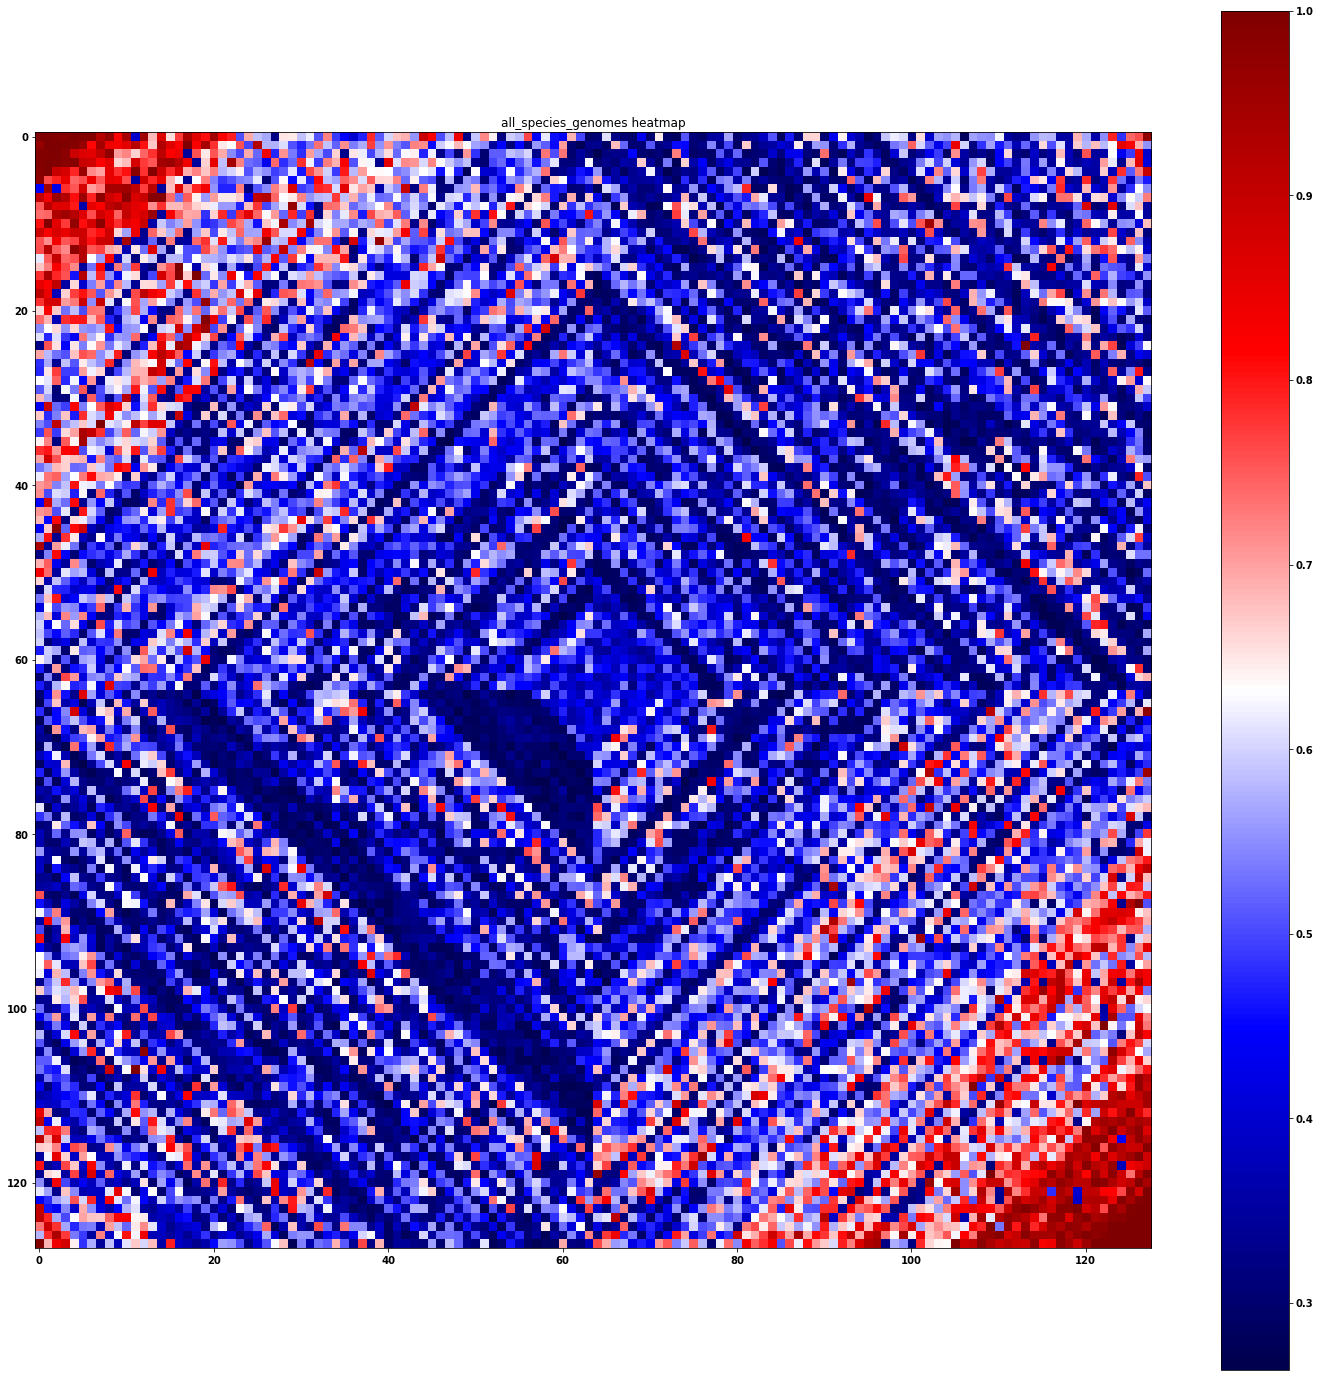

done


In [55]:
def sequence_count(string, dictionary, length):
    for i in range(len(string)-(length-1)):
        temp_seq = string[i:i+length]
        dictionary[temp_seq]+= 1
    return dictionary

def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv(filename+'.csv', index= False, header = False)

def create_heatmap(filename):
    # Read in the file
    with open(filename+".txt", 'r') as file :
        filedata = file.read()

    # Replace the target string
    filedata = filedata.replace('Sequence unavailable', 'Sequence_unavailable')

    # Write the file out again
    with open(filename+".txt", 'w') as file:
        file.write(filedata)
    
    data = loadtxt(filename+".txt", comments=">",dtype="str")
    
    data = list(data)
    
    #create empty dict
    df = pd.read_csv("AGTC-7seq.csv", header = None)
    data_arr = np.array(df).flatten()
    data_dict = {data_arr[i]: 0 for i in range(0, len(data_arr))}
    
    allowed_char = 'AGCT'
    
    #1) Update the dictionary:
    for i in data:
        if all(ch in allowed_char for ch in i):
            data_dict= sequence_count(i,data_dict, SIZE)


    #2) Convert dictionary back into 1D array
    data_arr1 = np.array(list(data_dict.values()))
    
    #Convert 1D array back into a 2D array
    data_arr2 = np.reshape(data_arr1, (2**SIZE,2**SIZE))

    #save the map as a csv
    print_map(filename+'_map', data_arr2)

    #standardized the data with mean and std, then putting it through a sigmoid function 
    def sigmoid(x):
        e = np.exp(1)
        y = 1/(1+e**(-x))
        return y

    data_arr2 = (data_arr2 - data_arr2.mean())/(data_arr2.std())

    data_arr2 = sigmoid(data_arr2)
    
    font = {'weight' : 'bold',
            'size'   : 22}

    mpl.rc('font', **font)
    fig = plt.figure(figsize=(25,25))
    plt.imshow(data_arr2,cmap="seismic")
    plt.title(filename +" heatmap")
    plt.colorbar()
    plt.savefig(filename +" heatmap.png")
    plt.show()
    print("done")
    
create_heatmap("all_species_genomes")